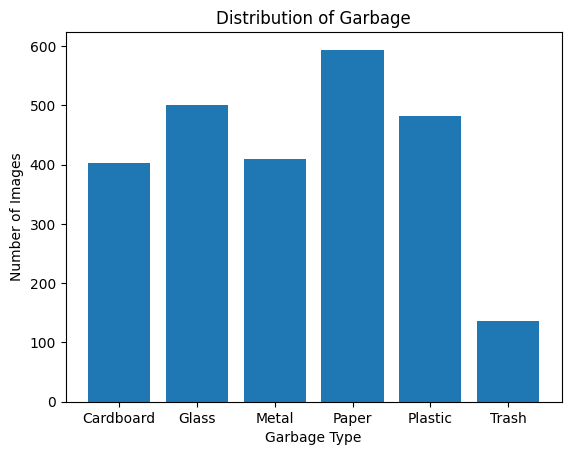

In [3]:
import matplotlib.pyplot as plt
import os

num_cardboard = len(os.listdir('/content/dataset-resized/cardboard'))
num_glass = len(os.listdir('/content/dataset-resized/glass'))
num_metal = len(os.listdir('/content/dataset-resized/metal'))
num_paper = len(os.listdir('/content/dataset-resized/paper'))
num_plastic = len(os.listdir('/content/dataset-resized/plastic'))
num_trash = len(os.listdir('/content/dataset-resized/trash'))

counts = [num_cardboard, num_glass, num_metal, num_paper, num_plastic, num_trash]

labels = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

plt.bar(labels, counts)
plt.title('Distribution of Garbage')
plt.xlabel('Garbage Type')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_ds = train_datagen.flow_from_directory('/content/dataset-resized', target_size=(224,224), batch_size=32, class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_ds = val_datagen.flow_from_directory('/content/dataset-resized', target_size=(224,224), batch_size=32, class_mode='categorical')


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(train_ds, epochs=20, validation_data=val_ds)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

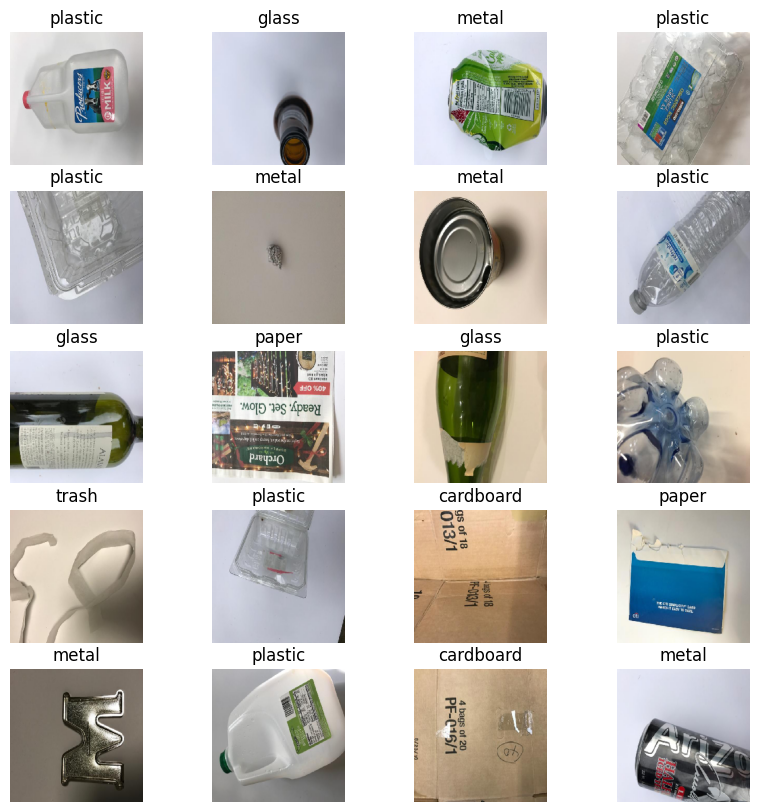

In [6]:
# displaying random images from dataset with labels
images, labels = next(val_ds)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(list(train_ds.class_indices.keys())[list(train_ds.class_indices.values()).index(labels[i].argmax())])
    ax.axis('off')
plt.show()

In [7]:
# model.save('garbage_classification_20.h5')

Saving metal18.jpg to metal18.jpg


1/1 [==============================] - 0s 69ms/step


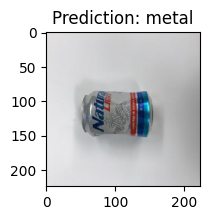

In [13]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files


uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# Load the model
model = load_model('garbage_classification_20.h5')

# Load the image and preprocess it
img = image.load_img(file_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Get the predicted class probabilities
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])
class_label = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'][class_idx]

plt.figure(figsize = (10,2))
plt.imshow(img)
plt.title(f'Prediction: {class_label}')
plt.show()
